In [9]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,Flatten
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow import keras

<h2>Step 1 </h2>
<h3>Input in fuctional API </h3>

In [3]:
input_layer = tf.keras.Input(shape=(28, 28))

<h2>Step 2</h2>

In [13]:
flatten_layer = tf.keras.layers.Flatten()(input_layer)
first_dense = tf.keras.layers.Dense(512, activation=tf.nn.relu)(flatten_layer)

second_dense = tf.keras.layers.Dense(256, activation=tf.nn.relu)(first_dense)
third_dense=tf.keras.layers.Dense(128,activation=tf.nn.relu)(second_dense)
output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(third_dense)
func_model = Model(inputs=input_layer, outputs=output_layer,name= "fashoin minist model")

In [14]:
func_model.summary()

Model: "fashoin minist model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
________________________________________

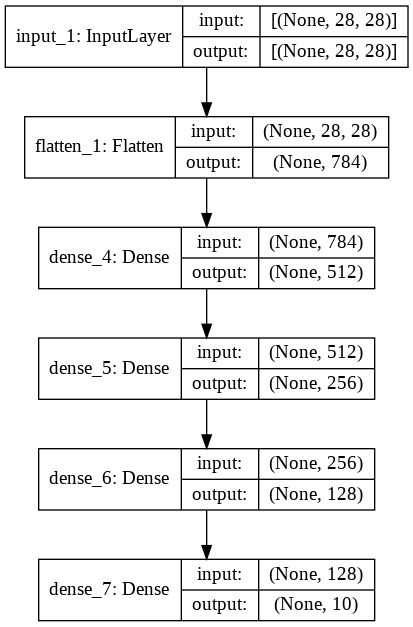

In [12]:
keras.utils.plot_model(func_model, "my_first_model_with_shape_info.png", show_shapes=True)

In [6]:
#data set
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
func_model.compile(optimizer=tf.optimizers.Adam(),
                   loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
func_model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4799 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3624 - accuracy: 0.8676
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3270 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3014 - accuracy: 0.8892
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2827 - accuracy: 0.8946


In [ ]:
func_model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.1142 - accuracy: 0.8936


[1.1142419576644897, 0.8935999870300293]